# Data Wrangling with Spark

This is the code similar to a previous exercise, only this time we will run it in Azure Databricks. Run each code cell to understand what the code does and how it works.

These first cells import libraries and then read in the data set

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
path = "/FileStore/sparkify_log_small.json"
user_log = spark.read.json(path)

# Data Exploration 

The next cells explore the data set.

Notice the different ways of showing information in the notebook (show() vs display)

In [0]:
user_log.take(5)

Out[42]: [Row(_corrupt_record='[', artist=None, auth=None, firstName=None, gender=None, itemInSession=None, lastName=None, length=None, level=None, location=None, method=None, page=None, registration=None, sessionId=None, song=None, status=None, ts=None, userAgent=None, userId=None),
 Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(_corrupt_record=None, artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(_corrupt_record=None, artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstName='Vera', gender='F', itemInSession=6, lastName='Blackwell', length=196.20526, level='paid', location='Racine, WI', method='PUT', page='NextSong', registration=1499855749284, sessionId=5516, song='Good Girls Go Bad (Feat.Leighton Meester) (Album Version)', status=200, ts=1513720881284, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2"', userId='2219'),
 Row(_corrupt_record=None, artist='Alex Smoke', auth='Logged In', firstName='Sophee', gender='F', itemInSession=8, lastName='Barker', length=405.99465, level='paid', location='San Luis Obispo-Paso Robles-Arroyo Grande, CA', method='PUT', page='NextSong', registration=1513009647284, sessionId=2372, song="Don't See The Point", status=200, ts=1513720905284, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='2373')]

In [0]:
user_log.printSchema()

root
-- _corrupt_record: string (nullable = true)
-- artist: string (nullable = true)
-- auth: string (nullable = true)
-- firstName: string (nullable = true)
-- gender: string (nullable = true)
-- itemInSession: long (nullable = true)
-- lastName: string (nullable = true)
-- length: double (nullable = true)
-- level: string (nullable = true)
-- location: string (nullable = true)
-- method: string (nullable = true)
-- page: string (nullable = true)
-- registration: long (nullable = true)
-- sessionId: long (nullable = true)
-- song: string (nullable = true)
-- status: long (nullable = true)
-- ts: long (nullable = true)
-- userAgent: string (nullable = true)
-- userId: string (nullable = true)

In [0]:
display(user_log.describe())

summary,_corrupt_record,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
count,2,8347,10000,9664,9664,10000,9664,8347,10000,9664,10000,10000,9664,10000,8347,10000,10000,9664,10000,10002
mean,null,461.0,null,null,null,19.6734,null,249.6486587492506,null,null,null,null,1.5046953695887393E12,4436.7511,Infinity,202.8984,1.5137859954164E12,null,1442.4413286423842,11.290441911617677
stddev,null,300.0,null,null,null,25.382114916132608,null,95.00437130781461,null,null,null,null,8.47314252131656E9,2043.1281541827561,NaN,18.04179115450588,3.290828862357974E7,null,829.8909432082621,7.044399496639046
min,[,!!!,Guest,Aakash,F,0,Acevedo,1.12281,free,"Aberdeen, WA",GET,About,1463503881284,9,#1,200,1513720872284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10) AppleWebKit/538.46 (KHTML, like Gecko) Version/8.0 Safari/538.46""",,-1
max,],ÃÂlafur Arnalds,Logged Out,Zoie,M,163,Zuniga,1806.8371,paid,"Yuma, AZ",PUT,Upgrade,1513760702284,7144,wingless,404,1513848349284,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0),999,23


In [0]:
display(user_log.describe("artist"))

summary,artist
count,8347
mean,461.0
stddev,300.0
min,!!!
max,ÃÂlafur Arnalds


In [0]:
user_log.describe("sessionId").show()

+-------+------------------+
summary| sessionId|
+-------+------------------+
 count| 10000|
 mean| 4436.7511|
 stddev|2043.1281541827561|
 min| 9|
 max| 7144|
+-------+------------------+

In [0]:
user_log.count()

Out[47]: 10002

In [0]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
 page|
+----------------+
 null|
 About|
 Downgrade|
 Error|
 Help|
 Home|
 Login|
 Logout|
 NextSong|
 Save Settings|
 Settings|
Submit Downgrade|
 Submit Upgrade|
 Upgrade|
+----------------+

In [0]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

Out[49]: [Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Heads Will Roll'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Bleed It Out [Live At Milton Keynes]'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Clocks'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Love Rain'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song="Ry Ry's Song (Album Version)"),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='The Invisible Man'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Catch You Baby (Steve Pitron & Max Sanna Radio Edit)'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Ask The Mountains'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Given Up (Album Version)'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='El Cuatrero'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Hero/Heroine'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Spring'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Rising Moon'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Tough Little Boys'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song="Qu'Est-Ce Que T'Es Belle"),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Secrets'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Under The Gun')]

# Calculating Statistics by Hour

In [0]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour if not x is None else -1, IntegerType())

In [0]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [0]:
display(user_log)

_corrupt_record,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
[,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-1
null,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",1046,22
null,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",1000,22
null,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Album Version),200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2""",2219,22
null,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",2373,22
null,null,Logged In,Jordyn,F,0,Jones,null,free,"Syracuse, NY",GET,Home,1513648531284,1746,null,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",1747,22
null,null,Logged In,Jordyn,F,1,Jones,null,free,"Syracuse, NY",GET,Settings,1513648531284,1746,null,200,1513720932284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",1747,22
null,Redman,Logged In,Paige,F,0,Hunter,154.53995,free,"Brownwood, TX",PUT,NextSong,1498414068284,4406,Smoke Buddah,200,1513720955284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",1162,22
null,Ulrich Schnauss,Logged In,Gabriel,M,2,Koch,402.93832,paid,"Panama City, FL",PUT,NextSong,1505820418284,1060,On My Own,200,1513720959284,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:32.0) Gecko/20100101 Firefox/32.0,1061,22
null,null,Logged In,Mason,M,2,Thomas,null,paid,"Indianapolis-Carmel-Anderson, IN",GET,Home,1487015656284,5661,null,200,1513720959284,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.2; WOW64; Trident/6.0),748,22


In [0]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))

In [0]:
songs_in_hour.show()

+----+-----+
hour|count|
+----+-----+
 0| 456|
 1| 454|
 2| 382|
 3| 302|
 4| 352|
 5| 276|
 6| 348|
 7| 358|
 8| 375|
 9| 249|
 10| 216|
 11| 228|
 12| 251|
 13| 339|
 14| 462|
 15| 479|
 16| 484|
 17| 430|
 18| 362|
 19| 295|
+----+-----+
only showing top 20 rows

In [0]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

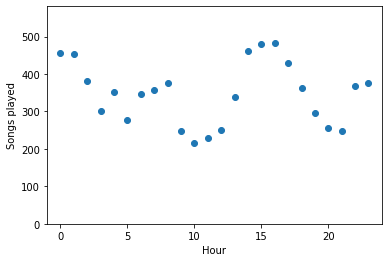

In [0]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

# Drop Rows with Missing Values

As you'll see, it turns out there are no missing values in the userID or session columns. But there are userID values that are empty strings.

In [0]:
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [0]:
user_log_valid.count()

Out[58]: 10000

In [0]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
userId|
+------+
 null|
 |
 10|
 100|
 1000|
 1003|
 1005|
 1006|
 1017|
 1019|
 1020|
 1022|
 1025|
 1030|
 1035|
 1037|
 104|
 1040|
 1042|
 1043|
+------+
only showing top 20 rows

In [0]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [0]:
user_log_valid.count()

Out[61]: 9664

# Users Downgrade Their Accounts

Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

In [0]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
_corrupt_record|artist| auth|firstName|gender|itemInSession|lastName|length|level| location|method| page| registration|sessionId|song|status| ts| userAgent|userId|hour|
+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
 null| null|Logged In| Kelly| F| 24| Newton| null| paid|Houston-The Woodl...| PUT|Submit Downgrade|1513283366284| 5931|null| 307|1513768454284|Mozilla/5.0 (Wind...| 1138| 11|
+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+

In [0]:
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()

Out[63]: [Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Breakeven'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Leaf House'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='NAISEN KANSSA'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="You're In My Heart"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Roll On Down The Highway'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Plasticities (Remix)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Secrets'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Hello'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='I Never Told You'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Break Me'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='One Touch One Bounce'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Undo'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Overdue (Blackbeard Remix)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Slave To Love (1999 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Stronger'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='All Of Us (Album Version)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Sehr kosmisch'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='March Of The Celts'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Electricity'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Aces High'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Bananeira'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='The General'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='HÃ\x83Â©roe De Leyenda (VersiÃ\x83Â³n Maxi)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Don't Stop The Music"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="You're The One"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Entering White Cecilia'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Piccolo Cesare'),
 Row(userId='1138', firstname='Kelly', page='Help', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Last Christmas (Album Version)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='You Shook Me'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Going Steady'),
 Row(userId='1138', firstname='Kelly', pa

In [0]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [0]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [0]:
user_log_valid.head()

Out[66]: Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour=22, downgraded=0)

In [0]:
from pyspark.sql import Window

In [0]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [0]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [0]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").collect()

Out[70]: [Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731435284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731695284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731857284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513732160284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513732302284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513732540284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513732770284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513732994284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513733223284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513733456284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513733738284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513733941284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513734289284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513734598284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513734863284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513735174284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513735385284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513736040284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513736237284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513736446284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513736709284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513736915284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513737160284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513737460284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513737728284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513737936284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513738144284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513738197284, page='Help', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513738432284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513763195284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513763453284, page='NextSong', level